<a href="https://colab.research.google.com/github/siddahant/DESOPT/blob/Second/converges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np

In [185]:
fun= lambda x: (2-2*x[0]-3*x[1])**2 + (x[0])**2 + (x[1]-1)**2

def g(x):
  return np.array([(10*x[0]+12*x[1]-8), (12*x[0]+20*x[1]-14)])

H = np.array([[10,12],[12,20]])

In [212]:
def linesearch(x):
    a = 0.01
    d = -1 * g(x)
    t = 0.7
    def pi(a, x):
        return fun(x) - a * t * np.matmul(np.transpose(g(x)), d)
    while pi(a, x) < fun(x - a * g(x)):
        a = 0.5 * a
    return a

def gradient(fun, g, H, x0):
  x=x0
  iter=0
  error= np.linalg.norm(g(x))
  error_history =[]
  path=[]
  while error> 1e-03 and iter<1000:
    a=linesearch(x)
    x = x - a*(g(x))
    error=np.linalg.norm(g(x))
    path.append(x)
    error_history.append(error)
    iter +=1
  return x,error_history,path

In [216]:
x,error_history,path=gradient(fun, g, H, np.array([1,1]))


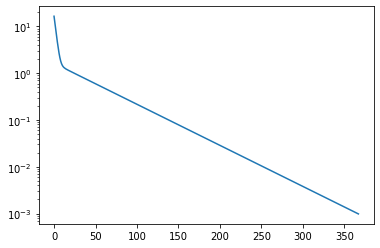

In [217]:
import matplotlib.pyplot as plt
plt.plot((error_history))
plt.yscale("log")


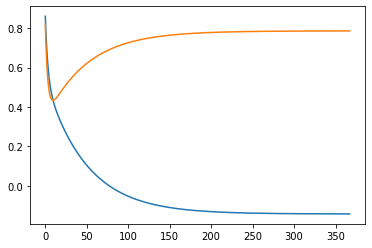

In [219]:
plt.plot((path))
# plt.yscale("log")